In [2]:
import os
import numpy as np
import pandas as pd
from glob import glob
import ast
from matplotlib import pyplot as plt
from numpy import nan
from tqdm import tqdm

In [3]:
path = 'D:/Data/PHM_Challenge_2021/'
train1_path = 'training_validation_1'
train2_path = 'training_validation_2'

In [4]:
'''
train1_path_list = glob(path+train1_path+'/*.csv')
train1_path_list.sort()

train2_path_list = glob(path+train2_path+'/*data.csv')
#train2_path_list = glob(path+train2_path+'/class_ 0*')
train2_path_list.sort()

field = pd.read_csv(path+train2_path+'/fields.csv')
'''

"\ntrain1_path_list = glob(path+train1_path+'/*.csv')\ntrain1_path_list.sort()\n\ntrain2_path_list = glob(path+train2_path+'/*data.csv')\n#train2_path_list = glob(path+train2_path+'/class_ 0*')\ntrain2_path_list.sort()\n\nfield = pd.read_csv(path+train2_path+'/fields.csv')\n"

In [5]:
normal_path_list = glob(path+train1_path+'/*.csv')
normal_path_list.sort()

train2_path_list = glob(path+train2_path+'/*data.csv')
#train2_path_list = glob(path+train2_path+'/class_ 0*')
train2_path_list.sort()


normal_path_list.extend(train2_path_list[:10])
abnormal_path_list = train2_path_list[10:]
field = pd.read_csv(path+train2_path+'/fields.csv')

In [19]:
pd.read_csv(normal_path_list[0])

,Unnamed: 0,class_ 0_0_data
0,CpuTemperature,"[[56.75, 44.75, 3.52372908531097, 47.833333333..."
1,DurationPickToPick,"[[0, 0.0, nan, nan, nan, nan, nan], [2, 0.1982..."
2,DurationRobotFromFeederToTestBench,"[[0, 0.0, nan, nan, nan, nan, nan], [3, 0.2973..."
3,DurationRobotFromTestBenchToFeeder,"[[0, 0.0, nan, nan, nan, nan, nan], [2, 0.1982..."
4,DurationTestBenchClosed,"[[0, 0.0, nan, nan, nan, nan, nan], [2, 0.1982..."
5,EPOSCurrent,"[[0, 0.0, nan, nan, nan, nan, nan], [76, 7.531..."
6,EPOSPosition,"[[0, 0.0, nan, nan, nan, nan, nan], [76, 7.531..."
7,EPOSVelocity,"[[0, 0.0, nan, nan, nan, nan, nan], [76, 7.531..."
8,ErrorFrame,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0..."
9,FeederAction1,"[[0], [0], [0], [0], [0], [0], [0], [0], [0], ..."


In [17]:
pd.read_csv(normal_path_list[0]).iloc[1,1]

'[[0, 0.0, nan, nan, nan, nan, nan], [2, 0.198206646086871, 3.192, 2.807, 0.192499999999998, 0.385, 2.9995], [3, 0.29677768288806, 3.23, 3.106, 0.0516741930002106, 0.0200000000000005, 3.16066666666667], [3, 0.298541377581173, 3.307, 3.103, 0.0853906057804809, 0.0310000000000006, 3.19166666666667], [3, 0.298554470904951, 3.242, 3.153, 0.0385774833578446, -0.0359999999999996, 3.18833333333333], [4, 0.39757226867429, 3.261, 3.155, 0.0385064929589699, 0.027000000000001, 3.2105], [3, 0.29874283934575, 3.226, 2.847, 0.171414377719285, -0.0164999999999997, 2.98433333333333], [3, 0.29806929489135, 3.168, 2.872, 0.134650164005351, 0.0110000000000001, 3.062], [3, 0.298616866398217, 3.175, 2.999, 0.0796673640137039, 0.0805000000000007, 3.11133333333333], [4, 0.3983492447134, 4.105, 2.768, 0.541127237810113, -0.239899999999999, 3.20475], [3, 0.298092180237264, 3.052, 2.828, 0.105359701341005, -0.000499999999999723, 2.903], [3, 0.298248135191108, 3.193, 3.057, 0.0586363558061209, 0.0140000000000002

In [7]:
feature_name = pd.read_csv(normal_path_list[0]).values[:,0]
field_name = field.values[:,1:]

In [8]:
def MAKE_TABLE(file, feature_name, field_name):
    #feature_name = file.iloc[:,0].to_numpy()
    data = file.iloc[:,1].values  
    empty_list = []
    
    for i, value in enumerate(data):        
        #field_name = field.iloc[i].to_list()[1:]
        string_to_num = np.array(eval(value))
        empty = np.empty((string_to_num.shape[0], 7-string_to_num.shape[1]))
        empty[:] = np.nan
        
        temp = np.concatenate([string_to_num, empty], axis = 1)
        table = pd.DataFrame(data = temp, columns = pd.MultiIndex.from_tuples(zip([feature_name[i]]*7, field_name[i])))
        empty_list.append(table)
    
    return pd.concat(empty_list, axis=1)

In [9]:
normal = []
for path in tqdm(normal_path_list):
    normal.append(MAKE_TABLE(pd.read_csv(path), feature_name, field_name))

abnormal = []
for path in tqdm(abnormal_path_list):
    abnormal.append(MAKE_TABLE(pd.read_csv(path), feature_name, field_name))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.39it/s]


In [16]:
normal[0].iloc[:5,:18]

CpuTemperature                                         DurationPickToPick  \
            vMax   vMin      vStd      value NaN NaN NaN               vCnt   
0          56.75  44.75  3.523729  47.833333 NaN NaN NaN                0.0   
1          48.75  42.25  2.395308  45.000000 NaN NaN NaN                2.0   
2          47.50  42.00  2.085815  43.825000 NaN NaN NaN                3.0   
3          48.25  42.25  1.853375  45.200000 NaN NaN NaN                3.0   
4          50.00  42.50  2.661766  45.700000 NaN NaN NaN                3.0   

                                                      \
      vFreq   vMax   vMin      vStd vTrend     value   
0  0.000000    NaN    NaN       NaN    NaN       NaN   
1  0.198207  3.192  2.807  0.192500  0.385  2.999500   
2  0.296778  3.230  3.106  0.051674  0.020  3.160667   
3  0.298541  3.307  3.103  0.085391  0.031  3.191667   
4  0.298554  3.242  3.153  0.038577 -0.036  3.188333   

  DurationRobotFromFeederToTestBench                          
                                vCnt     vFreq   vMax   vMin  
0                                0.0  0.000000    NaN    NaN  
1                                3.0  0.297310  0.676  0.639  
2                                3.0  0.296778  0.707  0.637  
3                                3.0  0.298541  0.679  0.637  
4                                3.0  0.298554  0.711  0.663

In [372]:
import missingno as msno
import matplotlib.pyplot as plt
def msno_vis_train_test(train , test , graph_type = "bar" , fig_kws = {"figsize" : (20,5)}) :
    fig , ax = plt.subplots(1,2,figsize=fig_kws.get("figsize", (20,5)) )
    axes = ax.flatten()
    if graph_type == "bar" :
        msno.bar(train, ax=axes[0])
        msno.bar(test, ax=axes[1])
    elif graph_type == "matrix" :
        msno.matrix(train, ax=axes[0])
        msno.matrix(test, ax=axes[1])
    #raise Exception(f"not supported graph type : {graph_type}, \n only supported by bar, matrix , dendrogram, heatmap")
    axes[0].set_title(fig_kws.get("train_title" , "train"), 
                      fontsize=fig_kws.get("title_font_size" , 15))
    axes[1].set_title(fig_kws.get("test_title" , "test"), 
                      fontsize=fig_kws.get("title_font_size" , 15))
    plt.show()

In [368]:
feature_name[16]

'FuseHeatSlopeNOK'

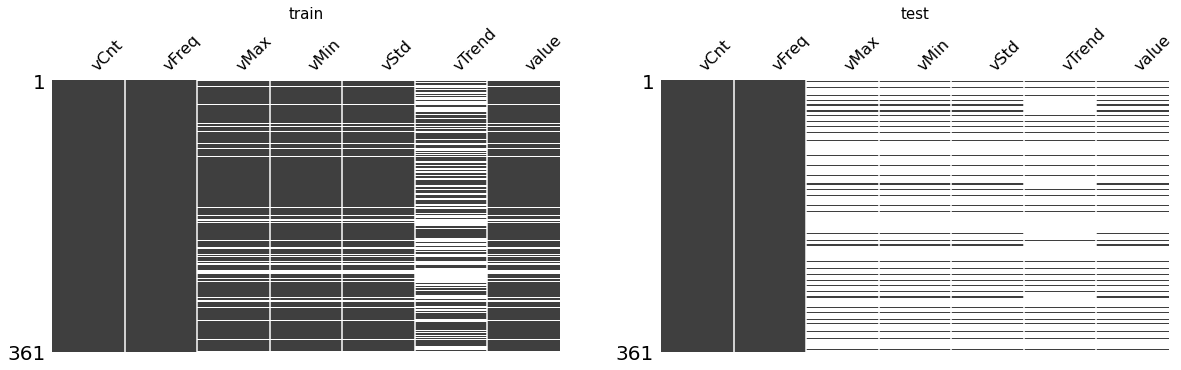

In [375]:
msno_vis_train_test(normal[0][feature_name[16]], normal[0][feature_name[38]], graph_type='matrix')

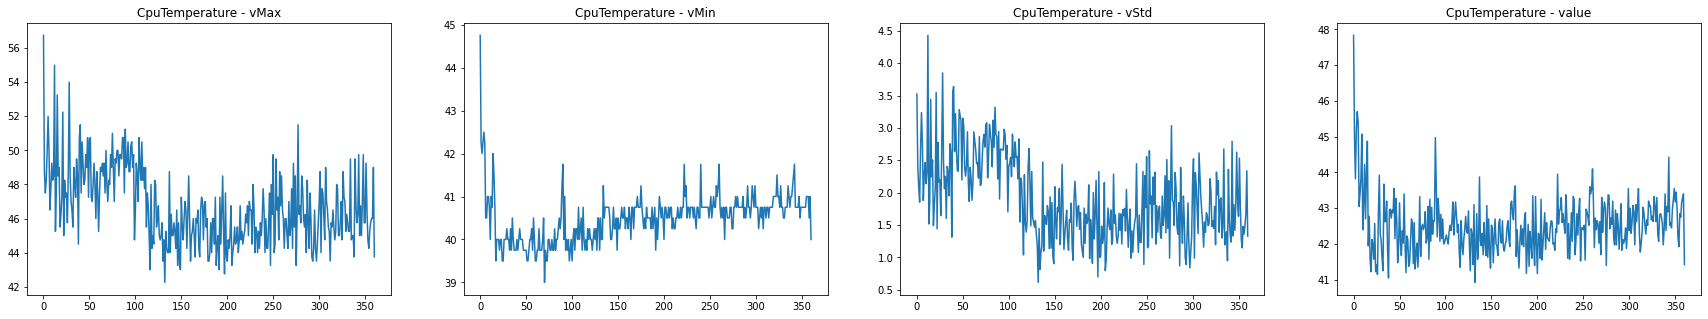

In [321]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(30, 5)
ax[0].plot(normal[0][feature_name[0]][field_name[0,0]])
ax[0].set_title(f"{feature_name[0]} - {field_name[0,0]}")

ax[1].plot(normal[0][feature_name[0]][field_name[0,1]])
ax[1].set_title(f"{feature_name[0]} - {field_name[0,1]}")

ax[2].plot(normal[0][feature_name[0]][field_name[0,2]])
ax[2].set_title(f"{feature_name[0]} - {field_name[0,2]}")

ax[3].plot(normal[0][feature_name[0]][field_name[0,3]])
ax[3].set_title(f"{feature_name[0]} - {field_name[0,3]}")

plt.show()

In [345]:
nan = field_name[0][4] 

nan